In [1]:
import torch
from monai.networks.nets import UNet
from monai.metrics import DiceMetric
from PIL import Image
import os
import matplotlib.pyplot as plt
from monai.networks.layers import Norm
import numpy as np
from monai.transforms import Transform
from monai.transforms import (
    Activations,
    EnsureChannelFirstd,
    Compose,
    ScaleIntensityd,
    ToTensor,
    AsDiscrete,
    Resized
)
from PIL import Image



# Directory path to save the analyzed images
analyzed_dir = r"E:\Aytekin\Data\AnalyzedBestModelGreen1"



# Directory paths for input and segmentation images
input_image_dir = r"E:\Aytekin\Data\Input"
segmentation_dir = r"E:\Aytekin\PredictionMasksGreen"
ignore_dir = r"E:\Aytekin\Data\UniqueIntensityLessThan750"




# List of strings to exclude from image names
exclude_strings = ["12_0500", "29_0520", "01_0520", "08_0420", "29_0820", "29_1120", "29_1420", "29_1720", "29_2020", "29_2320"]

# List all .tif image files in the input and segmentation directories
input_image_files = [os.path.join(input_image_dir, filename) for filename in os.listdir(input_image_dir) if filename.endswith(".tif") and all(exclude not in filename for exclude in exclude_strings)]
segmentation_files = [os.path.join(segmentation_dir, filename) for filename in os.listdir(segmentation_dir) if filename.endswith(".tif") and all(exclude not in filename for exclude in exclude_strings)]


# Extract file names without extensions
input_image_names = [os.path.splitext(os.path.basename(filename))[0] for filename in input_image_files]
segmentation_names = [os.path.splitext(os.path.basename(filename))[0] for filename in segmentation_files]

# Find the common file names between input and segmentation
common_names = set(input_image_names) & set(segmentation_names)

# List all .tif image files in the directories again (overwrite previous lists)
input_image_files = [os.path.join(input_image_dir, filename) for filename in os.listdir(input_image_dir) if filename.endswith(".tif")]
segmentation_files = [os.path.join(segmentation_dir, filename) for filename in os.listdir(segmentation_dir) if filename.endswith(".tif")]

# Exclude images from UniqueIntensityLessThan750 directory
ignore_files = [os.path.join(ignore_dir, filename) for filename in os.listdir(ignore_dir) if filename.endswith(".tif")]
ignore_file_names = [os.path.splitext(os.path.basename(filename))[0] for filename in ignore_files]

# Filter input_image_files and segmentation_files based on common names and ignoring specific names
input_image_files = [filename for filename in input_image_files if os.path.splitext(os.path.basename(filename))[0] in common_names and os.path.splitext(os.path.basename(filename))[0] not in ignore_file_names]
segmentation_files = [filename for filename in segmentation_files if os.path.splitext(os.path.basename(filename))[0] in common_names and os.path.splitext(os.path.basename(filename))[0] not in ignore_file_names]

# Define transformations for input images
input_transforms = Compose([
    EnsureChannelFirstd(keys=["img"], channel_dim="no_channel"),
    Resized(keys=["img"], spatial_size=(512, 512), mode="nearest"),
    # Add any additional transformations if needed
])


# Iterate through the input images
for input_image_file, _ in zip(input_image_files, segmentation_files):
    input_image = Image.open(input_image_file)
    
    # Apply transformations to the input image
    input_data = input_transforms({"img": np.array(input_image, dtype=np.float32)})
    input_image_resized = np.squeeze(input_data["img"])
    
    # Load the corresponding prediction mask
    prediction_mask_path = os.path.join(r"E:\Aytekin\PredictionMasksGreen", os.path.splitext(os.path.basename(input_image_file))[0] + ".tif")
    prediction_mask = Image.open(prediction_mask_path)
    prediction_mask_np = np.array(prediction_mask)
    
    # Overlay the input image and prediction mask
    analyzed_image = np.where(prediction_mask_np == 1, input_image_resized, 0)
    analyzed_image = Image.fromarray(analyzed_image)
    
    # Save the analyzed image
    filename_analyzed = os.path.splitext(os.path.basename(input_image_file))[0] + "_analyzed.tif"
    analyzed_image.save(os.path.join(analyzed_dir, filename_analyzed), format='TIFF')
    print(f"{filename_analyzed} saved.")


R_01_0507_939_C1-1-green_analyzed.tif saved.
R_01_0507_939_F1-1-green_analyzed.tif saved.
R_01_0507_939_G1-1-green_analyzed.tif saved.
R_01_0507_939_H1-1-green_analyzed.tif saved.
R_01_0507_941_G1-1-green_analyzed.tif saved.
R_01_0507_941_H1-1-green_analyzed.tif saved.
R_01_0507_941_H2-1-green_analyzed.tif saved.
R_01_0807_939_C1-1-green_analyzed.tif saved.
R_01_0807_939_F1-1-green_analyzed.tif saved.
R_01_0807_939_G1-1-green_analyzed.tif saved.
R_01_0807_939_G2-1-green_analyzed.tif saved.
R_01_0807_939_H1-1-green_analyzed.tif saved.
R_01_0807_939_H3-1-green_analyzed.tif saved.
R_01_0807_940_F5-1-green_analyzed.tif saved.
R_01_0807_941_E1-1-green_analyzed.tif saved.
R_01_0807_941_G1-1-green_analyzed.tif saved.
R_01_0807_941_H1-1-green_analyzed.tif saved.
R_01_0807_941_H2-1-green_analyzed.tif saved.
R_01_1051_938_A6-1-green_analyzed.tif saved.
R_01_1051_938_B2-1-green_analyzed.tif saved.
R_01_1051_938_B3-1-green_analyzed.tif saved.
R_01_1051_938_B4-1-green_analyzed.tif saved.
R_01_1051_

R_01_1407_940_A7-1-green_analyzed.tif saved.
R_01_1407_940_B1-1-green_analyzed.tif saved.
R_01_1407_940_B10-1-green_analyzed.tif saved.
R_01_1407_940_B11-1-green_analyzed.tif saved.
R_01_1407_940_B12-1-green_analyzed.tif saved.
R_01_1407_940_B3-1-green_analyzed.tif saved.
R_01_1407_940_B6-1-green_analyzed.tif saved.
R_01_1407_940_B7-1-green_analyzed.tif saved.
R_01_1407_940_B8-1-green_analyzed.tif saved.
R_01_1407_940_C10-1-green_analyzed.tif saved.
R_01_1407_940_C12-1-green_analyzed.tif saved.
R_01_1407_940_C3-1-green_analyzed.tif saved.
R_01_1407_940_C4-1-green_analyzed.tif saved.
R_01_1407_940_C8-1-green_analyzed.tif saved.
R_01_1407_940_C9-1-green_analyzed.tif saved.
R_01_1407_940_D1-1-green_analyzed.tif saved.
R_01_1407_940_D10-1-green_analyzed.tif saved.
R_01_1407_940_D12-1-green_analyzed.tif saved.
R_01_1407_940_D2-1-green_analyzed.tif saved.
R_01_1407_940_D4-1-green_analyzed.tif saved.
R_01_1407_940_D5-1-green_analyzed.tif saved.
R_01_1407_940_D6-1-green_analyzed.tif saved.
R_0

R_01_1707_939_B5-1-green_analyzed.tif saved.
R_01_1707_939_B6-1-green_analyzed.tif saved.
R_01_1707_939_B7-1-green_analyzed.tif saved.
R_01_1707_939_B8-1-green_analyzed.tif saved.
R_01_1707_939_B9-1-green_analyzed.tif saved.
R_01_1707_939_C1-1-green_analyzed.tif saved.
R_01_1707_939_C10-1-green_analyzed.tif saved.
R_01_1707_939_C2-1-green_analyzed.tif saved.
R_01_1707_939_C3-1-green_analyzed.tif saved.
R_01_1707_939_C4-1-green_analyzed.tif saved.
R_01_1707_939_C5-1-green_analyzed.tif saved.
R_01_1707_939_C6-1-green_analyzed.tif saved.
R_01_1707_939_C7-1-green_analyzed.tif saved.
R_01_1707_939_C9-1-green_analyzed.tif saved.
R_01_1707_939_D1-1-green_analyzed.tif saved.
R_01_1707_939_D10-1-green_analyzed.tif saved.
R_01_1707_939_D12-1-green_analyzed.tif saved.
R_01_1707_939_D2-1-green_analyzed.tif saved.
R_01_1707_939_D3-1-green_analyzed.tif saved.
R_01_1707_939_D5-1-green_analyzed.tif saved.
R_01_1707_939_D6-1-green_analyzed.tif saved.
R_01_1707_939_D7-1-green_analyzed.tif saved.
R_01_17

R_01_1707_941_E1-1-green_analyzed.tif saved.
R_01_1707_941_E10-1-green_analyzed.tif saved.
R_01_1707_941_E11-1-green_analyzed.tif saved.
R_01_1707_941_E12-1-green_analyzed.tif saved.
R_01_1707_941_E2-1-green_analyzed.tif saved.
R_01_1707_941_E3-1-green_analyzed.tif saved.
R_01_1707_941_E4-1-green_analyzed.tif saved.
R_01_1707_941_E5-1-green_analyzed.tif saved.
R_01_1707_941_E6-1-green_analyzed.tif saved.
R_01_1707_941_E7-1-green_analyzed.tif saved.
R_01_1707_941_E8-1-green_analyzed.tif saved.
R_01_1707_941_E9-1-green_analyzed.tif saved.
R_01_1707_941_F1-1-green_analyzed.tif saved.
R_01_1707_941_F2-1-green_analyzed.tif saved.
R_01_1707_941_F3-1-green_analyzed.tif saved.
R_01_1707_941_F4-1-green_analyzed.tif saved.
R_01_1707_941_F5-1-green_analyzed.tif saved.
R_01_1707_941_F6-1-green_analyzed.tif saved.
R_01_1707_941_G1-1-green_analyzed.tif saved.
R_01_1707_941_G10-1-green_analyzed.tif saved.
R_01_1707_941_G11-1-green_analyzed.tif saved.
R_01_1707_941_G12-1-green_analyzed.tif saved.
R_01

R_01_2007_939_H9-1-green_analyzed.tif saved.
R_01_2007_940_A10-1-green_analyzed.tif saved.
R_01_2007_940_A11-1-green_analyzed.tif saved.
R_01_2007_940_A12-1-green_analyzed.tif saved.
R_01_2007_940_A2-1-green_analyzed.tif saved.
R_01_2007_940_A3-1-green_analyzed.tif saved.
R_01_2007_940_A4-1-green_analyzed.tif saved.
R_01_2007_940_A5-1-green_analyzed.tif saved.
R_01_2007_940_A6-1-green_analyzed.tif saved.
R_01_2007_940_A7-1-green_analyzed.tif saved.
R_01_2007_940_A9-1-green_analyzed.tif saved.
R_01_2007_940_B1-1-green_analyzed.tif saved.
R_01_2007_940_B10-1-green_analyzed.tif saved.
R_01_2007_940_B11-1-green_analyzed.tif saved.
R_01_2007_940_B12-1-green_analyzed.tif saved.
R_01_2007_940_B2-1-green_analyzed.tif saved.
R_01_2007_940_B3-1-green_analyzed.tif saved.
R_01_2007_940_B4-1-green_analyzed.tif saved.
R_01_2007_940_B5-1-green_analyzed.tif saved.
R_01_2007_940_B6-1-green_analyzed.tif saved.
R_01_2007_940_B7-1-green_analyzed.tif saved.
R_01_2007_940_B8-1-green_analyzed.tif saved.
R_01

R_01_2251_938_A8-1-green_analyzed.tif saved.
R_01_2251_938_A9-1-green_analyzed.tif saved.
R_01_2251_938_B1-1-green_analyzed.tif saved.
R_01_2251_938_B10-1-green_analyzed.tif saved.
R_01_2251_938_B11-1-green_analyzed.tif saved.
R_01_2251_938_B12-1-green_analyzed.tif saved.
R_01_2251_938_B2-1-green_analyzed.tif saved.
R_01_2251_938_B3-1-green_analyzed.tif saved.
R_01_2251_938_B4-1-green_analyzed.tif saved.
R_01_2251_938_B5-1-green_analyzed.tif saved.
R_01_2251_938_B6-1-green_analyzed.tif saved.
R_01_2251_938_B7-1-green_analyzed.tif saved.
R_01_2251_938_B8-1-green_analyzed.tif saved.
R_01_2251_938_B9-1-green_analyzed.tif saved.
R_01_2251_938_C1-1-green_analyzed.tif saved.
R_01_2251_938_C10-1-green_analyzed.tif saved.
R_01_2251_938_C12-1-green_analyzed.tif saved.
R_01_2251_938_C2-1-green_analyzed.tif saved.
R_01_2251_938_C3-1-green_analyzed.tif saved.
R_01_2251_938_C4-1-green_analyzed.tif saved.
R_01_2251_938_C5-1-green_analyzed.tif saved.
R_01_2251_938_C6-1-green_analyzed.tif saved.
R_01_

R_01_2307_940_E2-1-green_analyzed.tif saved.
R_01_2307_940_E3-1-green_analyzed.tif saved.
R_01_2307_940_E4-1-green_analyzed.tif saved.
R_01_2307_940_E5-1-green_analyzed.tif saved.
R_01_2307_940_E6-1-green_analyzed.tif saved.
R_01_2307_940_E7-1-green_analyzed.tif saved.
R_01_2307_940_E8-1-green_analyzed.tif saved.
R_01_2307_940_E9-1-green_analyzed.tif saved.
R_01_2307_940_F1-1-green_analyzed.tif saved.
R_01_2307_940_F10-1-green_analyzed.tif saved.
R_01_2307_940_F11-1-green_analyzed.tif saved.
R_01_2307_940_F12-1-green_analyzed.tif saved.
R_01_2307_940_F2-1-green_analyzed.tif saved.
R_01_2307_940_F3-1-green_analyzed.tif saved.
R_01_2307_940_F4-1-green_analyzed.tif saved.
R_01_2307_940_F5-1-green_analyzed.tif saved.
R_01_2307_940_F6-1-green_analyzed.tif saved.
R_01_2307_940_F7-1-green_analyzed.tif saved.
R_01_2307_940_F8-1-green_analyzed.tif saved.
R_01_2307_940_F9-1-green_analyzed.tif saved.
R_01_2307_940_G1-1-green_analyzed.tif saved.
R_01_2307_940_G10-1-green_analyzed.tif saved.
R_01_2

R_02_0207_939_A10-1-green_analyzed.tif saved.
R_02_0207_939_A11-1-green_analyzed.tif saved.
R_02_0207_939_A12-1-green_analyzed.tif saved.
R_02_0207_939_A2-1-green_analyzed.tif saved.
R_02_0207_939_A3-1-green_analyzed.tif saved.
R_02_0207_939_A4-1-green_analyzed.tif saved.
R_02_0207_939_A5-1-green_analyzed.tif saved.
R_02_0207_939_A6-1-green_analyzed.tif saved.
R_02_0207_939_A7-1-green_analyzed.tif saved.
R_02_0207_939_A8-1-green_analyzed.tif saved.
R_02_0207_939_A9-1-green_analyzed.tif saved.
R_02_0207_939_B1-1-green_analyzed.tif saved.
R_02_0207_939_B10-1-green_analyzed.tif saved.
R_02_0207_939_B11-1-green_analyzed.tif saved.
R_02_0207_939_B12-1-green_analyzed.tif saved.
R_02_0207_939_B2-1-green_analyzed.tif saved.
R_02_0207_939_B3-1-green_analyzed.tif saved.
R_02_0207_939_B4-1-green_analyzed.tif saved.
R_02_0207_939_B5-1-green_analyzed.tif saved.
R_02_0207_939_B6-1-green_analyzed.tif saved.
R_02_0207_939_B7-1-green_analyzed.tif saved.
R_02_0207_939_B8-1-green_analyzed.tif saved.
R_02

R_02_0207_941_A11-1-green_analyzed.tif saved.
R_02_0207_941_A12-1-green_analyzed.tif saved.
R_02_0207_941_A2-1-green_analyzed.tif saved.
R_02_0207_941_A3-1-green_analyzed.tif saved.
R_02_0207_941_A4-1-green_analyzed.tif saved.
R_02_0207_941_A5-1-green_analyzed.tif saved.
R_02_0207_941_A6-1-green_analyzed.tif saved.
R_02_0207_941_A7-1-green_analyzed.tif saved.
R_02_0207_941_A8-1-green_analyzed.tif saved.
R_02_0207_941_A9-1-green_analyzed.tif saved.
R_02_0207_941_B1-1-green_analyzed.tif saved.
R_02_0207_941_B10-1-green_analyzed.tif saved.
R_02_0207_941_B11-1-green_analyzed.tif saved.
R_02_0207_941_B12-1-green_analyzed.tif saved.
R_02_0207_941_B2-1-green_analyzed.tif saved.
R_02_0207_941_B3-1-green_analyzed.tif saved.
R_02_0207_941_B4-1-green_analyzed.tif saved.
R_02_0207_941_B5-1-green_analyzed.tif saved.
R_02_0207_941_B6-1-green_analyzed.tif saved.
R_02_0207_941_B7-1-green_analyzed.tif saved.
R_02_0207_941_B8-1-green_analyzed.tif saved.
R_02_0207_941_B9-1-green_analyzed.tif saved.
R_02_

R_02_0507_939_D7-1-green_analyzed.tif saved.
R_02_0507_939_D8-1-green_analyzed.tif saved.
R_02_0507_939_D9-1-green_analyzed.tif saved.
R_02_0507_939_E1-1-green_analyzed.tif saved.
R_02_0507_939_E10-1-green_analyzed.tif saved.
R_02_0507_939_E11-1-green_analyzed.tif saved.
R_02_0507_939_E12-1-green_analyzed.tif saved.
R_02_0507_939_E2-1-green_analyzed.tif saved.
R_02_0507_939_E3-1-green_analyzed.tif saved.
R_02_0507_939_E4-1-green_analyzed.tif saved.
R_02_0507_939_E5-1-green_analyzed.tif saved.
R_02_0507_939_E6-1-green_analyzed.tif saved.
R_02_0507_939_E7-1-green_analyzed.tif saved.
R_02_0507_939_E8-1-green_analyzed.tif saved.
R_02_0507_939_E9-1-green_analyzed.tif saved.
R_02_0507_939_F1-1-green_analyzed.tif saved.
R_02_0507_939_F10-1-green_analyzed.tif saved.
R_02_0507_939_F11-1-green_analyzed.tif saved.
R_02_0507_939_F12-1-green_analyzed.tif saved.
R_02_0507_939_F2-1-green_analyzed.tif saved.
R_02_0507_939_F3-1-green_analyzed.tif saved.
R_02_0507_939_F4-1-green_analyzed.tif saved.
R_02

R_02_0507_941_D5-1-green_analyzed.tif saved.
R_02_0507_941_D6-1-green_analyzed.tif saved.
R_02_0507_941_D8-1-green_analyzed.tif saved.
R_02_0507_941_E1-1-green_analyzed.tif saved.
R_02_0507_941_E10-1-green_analyzed.tif saved.
R_02_0507_941_E11-1-green_analyzed.tif saved.
R_02_0507_941_E12-1-green_analyzed.tif saved.
R_02_0507_941_E2-1-green_analyzed.tif saved.
R_02_0507_941_E3-1-green_analyzed.tif saved.
R_02_0507_941_E4-1-green_analyzed.tif saved.
R_02_0507_941_E5-1-green_analyzed.tif saved.
R_02_0507_941_E6-1-green_analyzed.tif saved.
R_02_0507_941_E7-1-green_analyzed.tif saved.
R_02_0507_941_E8-1-green_analyzed.tif saved.
R_02_0507_941_E9-1-green_analyzed.tif saved.
R_02_0507_941_F1-1-green_analyzed.tif saved.
R_02_0507_941_F2-1-green_analyzed.tif saved.
R_02_0507_941_F3-1-green_analyzed.tif saved.
R_02_0507_941_F4-1-green_analyzed.tif saved.
R_02_0507_941_F5-1-green_analyzed.tif saved.
R_02_0507_941_F6-1-green_analyzed.tif saved.
R_02_0507_941_G1-1-green_analyzed.tif saved.
R_02_05

R_02_0807_939_G7-1-green_analyzed.tif saved.
R_02_0807_939_G8-1-green_analyzed.tif saved.
R_02_0807_939_G9-1-green_analyzed.tif saved.
R_02_0807_939_H1-1-green_analyzed.tif saved.
R_02_0807_939_H10-1-green_analyzed.tif saved.
R_02_0807_939_H11-1-green_analyzed.tif saved.
R_02_0807_939_H12-1-green_analyzed.tif saved.
R_02_0807_939_H2-1-green_analyzed.tif saved.
R_02_0807_939_H3-1-green_analyzed.tif saved.
R_02_0807_939_H4-1-green_analyzed.tif saved.
R_02_0807_939_H5-1-green_analyzed.tif saved.
R_02_0807_939_H6-1-green_analyzed.tif saved.
R_02_0807_939_H7-1-green_analyzed.tif saved.
R_02_0807_939_H8-1-green_analyzed.tif saved.
R_02_0807_939_H9-1-green_analyzed.tif saved.
R_02_0807_940_A1-1-green_analyzed.tif saved.
R_02_0807_940_A10-1-green_analyzed.tif saved.
R_02_0807_940_A11-1-green_analyzed.tif saved.
R_02_0807_940_A12-1-green_analyzed.tif saved.
R_02_0807_940_A2-1-green_analyzed.tif saved.
R_02_0807_940_A3-1-green_analyzed.tif saved.
R_02_0807_940_A4-1-green_analyzed.tif saved.
R_02

R_02_0807_941_H12-1-green_analyzed.tif saved.
R_02_0807_941_H2-1-green_analyzed.tif saved.
R_02_0807_941_H3-1-green_analyzed.tif saved.
R_02_0807_941_H4-1-green_analyzed.tif saved.
R_02_0807_941_H5-1-green_analyzed.tif saved.
R_02_0807_941_H6-1-green_analyzed.tif saved.
R_02_0807_941_H7-1-green_analyzed.tif saved.
R_02_0807_941_H8-1-green_analyzed.tif saved.
R_02_0807_941_H9-1-green_analyzed.tif saved.
R_02_1051_938_A1-1-green_analyzed.tif saved.
R_02_1051_938_A10-1-green_analyzed.tif saved.
R_02_1051_938_A11-1-green_analyzed.tif saved.
R_02_1051_938_A12-1-green_analyzed.tif saved.
R_02_1051_938_A2-1-green_analyzed.tif saved.
R_02_1051_938_A3-1-green_analyzed.tif saved.
R_02_1051_938_A4-1-green_analyzed.tif saved.
R_02_1051_938_A5-1-green_analyzed.tif saved.
R_02_1051_938_A6-1-green_analyzed.tif saved.
R_02_1051_938_A7-1-green_analyzed.tif saved.
R_02_1051_938_A8-1-green_analyzed.tif saved.
R_02_1051_938_A9-1-green_analyzed.tif saved.
R_02_1051_938_B1-1-green_analyzed.tif saved.
R_02_1

R_02_1107_940_B8-1-green_analyzed.tif saved.
R_02_1107_940_B9-1-green_analyzed.tif saved.
R_02_1107_940_C1-1-green_analyzed.tif saved.
R_02_1107_940_C10-1-green_analyzed.tif saved.
R_02_1107_940_C11-1-green_analyzed.tif saved.
R_02_1107_940_C12-1-green_analyzed.tif saved.
R_02_1107_940_C2-1-green_analyzed.tif saved.
R_02_1107_940_C3-1-green_analyzed.tif saved.
R_02_1107_940_C4-1-green_analyzed.tif saved.
R_02_1107_940_C5-1-green_analyzed.tif saved.
R_02_1107_940_C6-1-green_analyzed.tif saved.
R_02_1107_940_C7-1-green_analyzed.tif saved.
R_02_1107_940_C8-1-green_analyzed.tif saved.
R_02_1107_940_C9-1-green_analyzed.tif saved.
R_02_1107_940_D1-1-green_analyzed.tif saved.
R_02_1107_940_D10-1-green_analyzed.tif saved.
R_02_1107_940_D11-1-green_analyzed.tif saved.
R_02_1107_940_D12-1-green_analyzed.tif saved.
R_02_1107_940_D2-1-green_analyzed.tif saved.
R_02_1107_940_D3-1-green_analyzed.tif saved.
R_02_1107_940_D4-1-green_analyzed.tif saved.
R_02_1107_940_D5-1-green_analyzed.tif saved.
R_02

R_02_1351_938_D1-1-green_analyzed.tif saved.
R_02_1351_938_D10-1-green_analyzed.tif saved.
R_02_1351_938_D11-1-green_analyzed.tif saved.
R_02_1351_938_D12-1-green_analyzed.tif saved.
R_02_1351_938_D2-1-green_analyzed.tif saved.
R_02_1351_938_D3-1-green_analyzed.tif saved.
R_02_1351_938_D4-1-green_analyzed.tif saved.
R_02_1351_938_D5-1-green_analyzed.tif saved.
R_02_1351_938_D6-1-green_analyzed.tif saved.
R_02_1351_938_D7-1-green_analyzed.tif saved.
R_02_1351_938_D8-1-green_analyzed.tif saved.
R_02_1351_938_D9-1-green_analyzed.tif saved.
R_02_1351_938_E1-1-green_analyzed.tif saved.
R_02_1351_938_E2-1-green_analyzed.tif saved.
R_02_1351_938_E3-1-green_analyzed.tif saved.
R_02_1351_938_H1-1-green_analyzed.tif saved.
R_02_1351_938_H10-1-green_analyzed.tif saved.
R_02_1351_938_H11-1-green_analyzed.tif saved.
R_02_1351_938_H12-1-green_analyzed.tif saved.
R_02_1351_938_H2-1-green_analyzed.tif saved.
R_02_1351_938_H3-1-green_analyzed.tif saved.
R_02_1351_938_H4-1-green_analyzed.tif saved.
R_02

R_02_1407_940_F5-1-green_analyzed.tif saved.
R_02_1407_940_F6-1-green_analyzed.tif saved.
R_02_1407_940_F7-1-green_analyzed.tif saved.
R_02_1407_940_F8-1-green_analyzed.tif saved.
R_02_1407_940_F9-1-green_analyzed.tif saved.
R_02_1407_940_G1-1-green_analyzed.tif saved.
R_02_1407_940_G10-1-green_analyzed.tif saved.
R_02_1407_940_G11-1-green_analyzed.tif saved.
R_02_1407_940_G12-1-green_analyzed.tif saved.
R_02_1407_940_G2-1-green_analyzed.tif saved.
R_02_1407_940_G3-1-green_analyzed.tif saved.
R_02_1407_940_G4-1-green_analyzed.tif saved.
R_02_1407_940_G5-1-green_analyzed.tif saved.
R_02_1407_940_G6-1-green_analyzed.tif saved.
R_02_1407_940_G7-1-green_analyzed.tif saved.
R_02_1407_940_G8-1-green_analyzed.tif saved.
R_02_1407_940_G9-1-green_analyzed.tif saved.
R_02_1407_940_H1-1-green_analyzed.tif saved.
R_02_1407_940_H10-1-green_analyzed.tif saved.
R_02_1407_940_H11-1-green_analyzed.tif saved.
R_02_1407_940_H12-1-green_analyzed.tif saved.
R_02_1407_940_H2-1-green_analyzed.tif saved.
R_02

R_02_1707_939_A9-1-green_analyzed.tif saved.
R_02_1707_939_B1-1-green_analyzed.tif saved.
R_02_1707_939_B10-1-green_analyzed.tif saved.
R_02_1707_939_B11-1-green_analyzed.tif saved.
R_02_1707_939_B12-1-green_analyzed.tif saved.
R_02_1707_939_B2-1-green_analyzed.tif saved.
R_02_1707_939_B3-1-green_analyzed.tif saved.
R_02_1707_939_B4-1-green_analyzed.tif saved.
R_02_1707_939_B5-1-green_analyzed.tif saved.
R_02_1707_939_B6-1-green_analyzed.tif saved.
R_02_1707_939_B7-1-green_analyzed.tif saved.
R_02_1707_939_B8-1-green_analyzed.tif saved.
R_02_1707_939_B9-1-green_analyzed.tif saved.
R_02_1707_939_C1-1-green_analyzed.tif saved.
R_02_1707_939_C10-1-green_analyzed.tif saved.
R_02_1707_939_C11-1-green_analyzed.tif saved.
R_02_1707_939_C12-1-green_analyzed.tif saved.
R_02_1707_939_C2-1-green_analyzed.tif saved.
R_02_1707_939_C3-1-green_analyzed.tif saved.
R_02_1707_939_C4-1-green_analyzed.tif saved.
R_02_1707_939_C5-1-green_analyzed.tif saved.
R_02_1707_939_C6-1-green_analyzed.tif saved.
R_02

R_02_1707_941_A12-1-green_analyzed.tif saved.
R_02_1707_941_A2-1-green_analyzed.tif saved.
R_02_1707_941_A3-1-green_analyzed.tif saved.
R_02_1707_941_A4-1-green_analyzed.tif saved.
R_02_1707_941_A5-1-green_analyzed.tif saved.
R_02_1707_941_A6-1-green_analyzed.tif saved.
R_02_1707_941_A7-1-green_analyzed.tif saved.
R_02_1707_941_A8-1-green_analyzed.tif saved.
R_02_1707_941_A9-1-green_analyzed.tif saved.
R_02_1707_941_B1-1-green_analyzed.tif saved.
R_02_1707_941_B10-1-green_analyzed.tif saved.
R_02_1707_941_B11-1-green_analyzed.tif saved.
R_02_1707_941_B12-1-green_analyzed.tif saved.
R_02_1707_941_B2-1-green_analyzed.tif saved.
R_02_1707_941_B3-1-green_analyzed.tif saved.
R_02_1707_941_B4-1-green_analyzed.tif saved.
R_02_1707_941_B5-1-green_analyzed.tif saved.
R_02_1707_941_B6-1-green_analyzed.tif saved.
R_02_1707_941_B7-1-green_analyzed.tif saved.
R_02_1707_941_B8-1-green_analyzed.tif saved.
R_02_1707_941_B9-1-green_analyzed.tif saved.
R_02_1707_941_C1-1-green_analyzed.tif saved.
R_02_1

R_08_1320_933_H1-1-green_analyzed.tif saved.
R_08_1320_933_H3-1-green_analyzed.tif saved.
R_08_1320_933_H7-1-green_analyzed.tif saved.
R_08_1320_933_H8-1-green_analyzed.tif saved.
R_08_1620_930_A2-1-green_analyzed.tif saved.
R_08_1620_930_A4-1-green_analyzed.tif saved.
R_08_1620_930_A5-1-green_analyzed.tif saved.
R_08_1620_930_A6-1-green_analyzed.tif saved.
R_08_1620_930_B1-1-green_analyzed.tif saved.
R_08_1620_930_B11-1-green_analyzed.tif saved.
R_08_1620_930_B3-1-green_analyzed.tif saved.
R_08_1620_930_B7-1-green_analyzed.tif saved.
R_08_1620_930_D1-1-green_analyzed.tif saved.
R_08_1620_930_D10-1-green_analyzed.tif saved.
R_08_1620_930_D11-1-green_analyzed.tif saved.
R_08_1620_930_D12-1-green_analyzed.tif saved.
R_08_1620_930_D2-1-green_analyzed.tif saved.
R_08_1620_930_D3-1-green_analyzed.tif saved.
R_08_1620_930_D4-1-green_analyzed.tif saved.
R_08_1620_930_D5-1-green_analyzed.tif saved.
R_08_1620_930_D6-1-green_analyzed.tif saved.
R_08_1620_930_D7-1-green_analyzed.tif saved.
R_08_1

R_08_1920_931_A12-1-green_analyzed.tif saved.
R_08_1920_931_A2-1-green_analyzed.tif saved.
R_08_1920_931_A3-1-green_analyzed.tif saved.
R_08_1920_931_A7-1-green_analyzed.tif saved.
R_08_1920_931_A8-1-green_analyzed.tif saved.
R_08_1920_931_A9-1-green_analyzed.tif saved.
R_08_1920_931_B1-1-green_analyzed.tif saved.
R_08_1920_931_B10-1-green_analyzed.tif saved.
R_08_1920_931_B11-1-green_analyzed.tif saved.
R_08_1920_931_B12-1-green_analyzed.tif saved.
R_08_1920_931_B2-1-green_analyzed.tif saved.
R_08_1920_931_B3-1-green_analyzed.tif saved.
R_08_1920_931_B5-1-green_analyzed.tif saved.
R_08_1920_931_B6-1-green_analyzed.tif saved.
R_08_1920_931_B7-1-green_analyzed.tif saved.
R_08_1920_931_B8-1-green_analyzed.tif saved.
R_08_1920_931_B9-1-green_analyzed.tif saved.
R_08_1920_931_C1-1-green_analyzed.tif saved.
R_08_1920_931_C10-1-green_analyzed.tif saved.
R_08_1920_931_C12-1-green_analyzed.tif saved.
R_08_1920_931_C2-1-green_analyzed.tif saved.
R_08_1920_931_C3-1-green_analyzed.tif saved.
R_08

R_08_2220_930_B8-1-green_analyzed.tif saved.
R_08_2220_930_B9-1-green_analyzed.tif saved.
R_08_2220_930_C1-1-green_analyzed.tif saved.
R_08_2220_930_C10-1-green_analyzed.tif saved.
R_08_2220_930_C12-1-green_analyzed.tif saved.
R_08_2220_930_C3-1-green_analyzed.tif saved.
R_08_2220_930_C4-1-green_analyzed.tif saved.
R_08_2220_930_C5-1-green_analyzed.tif saved.
R_08_2220_930_C6-1-green_analyzed.tif saved.
R_08_2220_930_C7-1-green_analyzed.tif saved.
R_08_2220_930_D1-1-green_analyzed.tif saved.
R_08_2220_930_D10-1-green_analyzed.tif saved.
R_08_2220_930_D11-1-green_analyzed.tif saved.
R_08_2220_930_D12-1-green_analyzed.tif saved.
R_08_2220_930_D2-1-green_analyzed.tif saved.
R_08_2220_930_D3-1-green_analyzed.tif saved.
R_08_2220_930_D4-1-green_analyzed.tif saved.
R_08_2220_930_D5-1-green_analyzed.tif saved.
R_08_2220_930_D6-1-green_analyzed.tif saved.
R_08_2220_930_D7-1-green_analyzed.tif saved.
R_08_2220_930_D8-1-green_analyzed.tif saved.
R_08_2220_930_D9-1-green_analyzed.tif saved.
R_08_

R_08_2220_933_B10-1-green_analyzed.tif saved.
R_08_2220_933_B11-1-green_analyzed.tif saved.
R_08_2220_933_B12-1-green_analyzed.tif saved.
R_08_2220_933_B2-1-green_analyzed.tif saved.
R_08_2220_933_B3-1-green_analyzed.tif saved.
R_08_2220_933_B4-1-green_analyzed.tif saved.
R_08_2220_933_B5-1-green_analyzed.tif saved.
R_08_2220_933_B6-1-green_analyzed.tif saved.
R_08_2220_933_B7-1-green_analyzed.tif saved.
R_08_2220_933_B8-1-green_analyzed.tif saved.
R_08_2220_933_B9-1-green_analyzed.tif saved.
R_08_2220_933_C1-1-green_analyzed.tif saved.
R_08_2220_933_C10-1-green_analyzed.tif saved.
R_08_2220_933_C11-1-green_analyzed.tif saved.
R_08_2220_933_C12-1-green_analyzed.tif saved.
R_08_2220_933_C2-1-green_analyzed.tif saved.
R_08_2220_933_C4-1-green_analyzed.tif saved.
R_08_2220_933_C5-1-green_analyzed.tif saved.
R_08_2220_933_C6-1-green_analyzed.tif saved.
R_08_2220_933_C7-1-green_analyzed.tif saved.
R_08_2220_933_C8-1-green_analyzed.tif saved.
R_08_2220_933_C9-1-green_analyzed.tif saved.
R_08

R_09_0120_931_G11-1-green_analyzed.tif saved.
R_09_0120_931_G12-1-green_analyzed.tif saved.
R_09_0120_931_G2-1-green_analyzed.tif saved.
R_09_0120_931_G3-1-green_analyzed.tif saved.
R_09_0120_931_G4-1-green_analyzed.tif saved.
R_09_0120_931_G5-1-green_analyzed.tif saved.
R_09_0120_931_G6-1-green_analyzed.tif saved.
R_09_0120_931_G7-1-green_analyzed.tif saved.
R_09_0120_931_G8-1-green_analyzed.tif saved.
R_09_0120_931_G9-1-green_analyzed.tif saved.
R_09_0120_931_H1-1-green_analyzed.tif saved.
R_09_0120_931_H11-1-green_analyzed.tif saved.
R_09_0120_931_H12-1-green_analyzed.tif saved.
R_09_0120_931_H2-1-green_analyzed.tif saved.
R_09_0120_931_H3-1-green_analyzed.tif saved.
R_09_0120_931_H4-1-green_analyzed.tif saved.
R_09_0120_931_H5-1-green_analyzed.tif saved.
R_09_0120_931_H6-1-green_analyzed.tif saved.
R_09_0120_931_H7-1-green_analyzed.tif saved.
R_09_0120_931_H8-1-green_analyzed.tif saved.
R_09_0120_931_H9-1-green_analyzed.tif saved.
R_09_0120_932_A1-1-green_analyzed.tif saved.
R_09_0

R_09_0120_933_G5-1-green_analyzed.tif saved.
R_09_0120_933_G7-1-green_analyzed.tif saved.
R_09_0120_933_G8-1-green_analyzed.tif saved.
R_09_0120_933_G9-1-green_analyzed.tif saved.
R_09_0120_933_H1-1-green_analyzed.tif saved.
R_09_0120_933_H10-1-green_analyzed.tif saved.
R_09_0120_933_H11-1-green_analyzed.tif saved.
R_09_0120_933_H12-1-green_analyzed.tif saved.
R_09_0120_933_H2-1-green_analyzed.tif saved.
R_09_0120_933_H3-1-green_analyzed.tif saved.
R_09_0120_933_H4-1-green_analyzed.tif saved.
R_09_0120_933_H5-1-green_analyzed.tif saved.
R_09_0120_933_H7-1-green_analyzed.tif saved.
R_09_0120_933_H8-1-green_analyzed.tif saved.
R_09_0120_933_H9-1-green_analyzed.tif saved.
R_09_0420_930_A1-1-green_analyzed.tif saved.
R_09_0420_930_A2-1-green_analyzed.tif saved.
R_09_0420_930_A3-1-green_analyzed.tif saved.
R_09_0420_930_A4-1-green_analyzed.tif saved.
R_09_0420_930_A5-1-green_analyzed.tif saved.
R_09_0420_930_A6-1-green_analyzed.tif saved.
R_09_0420_930_B1-1-green_analyzed.tif saved.
R_09_04

R_09_0420_932_D11-1-green_analyzed.tif saved.
R_09_0420_932_D12-1-green_analyzed.tif saved.
R_09_0420_932_D2-1-green_analyzed.tif saved.
R_09_0420_932_D3-1-green_analyzed.tif saved.
R_09_0420_932_D4-1-green_analyzed.tif saved.
R_09_0420_932_D6-1-green_analyzed.tif saved.
R_09_0420_932_D7-1-green_analyzed.tif saved.
R_09_0420_932_D8-1-green_analyzed.tif saved.
R_09_0420_932_D9-1-green_analyzed.tif saved.
R_09_0420_932_E1-1-green_analyzed.tif saved.
R_09_0420_932_E10-1-green_analyzed.tif saved.
R_09_0420_932_E11-1-green_analyzed.tif saved.
R_09_0420_932_E12-1-green_analyzed.tif saved.
R_09_0420_932_E2-1-green_analyzed.tif saved.
R_09_0420_932_E3-1-green_analyzed.tif saved.
R_09_0420_932_E4-1-green_analyzed.tif saved.
R_09_0420_932_E5-1-green_analyzed.tif saved.
R_09_0420_932_E6-1-green_analyzed.tif saved.
R_09_0420_932_E7-1-green_analyzed.tif saved.
R_09_0420_932_E8-1-green_analyzed.tif saved.
R_09_0420_932_E9-1-green_analyzed.tif saved.
R_09_0420_932_F1-1-green_analyzed.tif saved.
R_09_

R_09_0720_930_D8-1-green_analyzed.tif saved.
R_09_0720_930_D9-1-green_analyzed.tif saved.
R_09_0720_930_E1-1-green_analyzed.tif saved.
R_09_0720_930_E2-1-green_analyzed.tif saved.
R_09_0720_930_E3-1-green_analyzed.tif saved.
R_09_0720_930_H1-1-green_analyzed.tif saved.
R_09_0720_930_H10-1-green_analyzed.tif saved.
R_09_0720_930_H11-1-green_analyzed.tif saved.
R_09_0720_930_H12-1-green_analyzed.tif saved.
R_09_0720_930_H2-1-green_analyzed.tif saved.
R_09_0720_930_H3-1-green_analyzed.tif saved.
R_09_0720_930_H4-1-green_analyzed.tif saved.
R_09_0720_930_H5-1-green_analyzed.tif saved.
R_09_0720_930_H6-1-green_analyzed.tif saved.
R_09_0720_930_H7-1-green_analyzed.tif saved.
R_09_0720_930_H8-1-green_analyzed.tif saved.
R_09_0720_930_H9-1-green_analyzed.tif saved.
R_09_0720_931_A1-1-green_analyzed.tif saved.
R_09_0720_931_A10-1-green_analyzed.tif saved.
R_09_0720_931_A11-1-green_analyzed.tif saved.
R_09_0720_931_A12-1-green_analyzed.tif saved.
R_09_0720_931_A2-1-green_analyzed.tif saved.
R_09

R_09_0720_932_H11-1-green_analyzed.tif saved.
R_09_0720_932_H12-1-green_analyzed.tif saved.
R_09_0720_932_H2-1-green_analyzed.tif saved.
R_09_0720_932_H3-1-green_analyzed.tif saved.
R_09_0720_932_H4-1-green_analyzed.tif saved.
R_09_0720_932_H5-1-green_analyzed.tif saved.
R_09_0720_932_H6-1-green_analyzed.tif saved.
R_09_0720_932_H7-1-green_analyzed.tif saved.
R_09_0720_932_H8-1-green_analyzed.tif saved.
R_09_0720_932_H9-1-green_analyzed.tif saved.
R_09_0720_933_A1-1-green_analyzed.tif saved.
R_09_0720_933_A10-1-green_analyzed.tif saved.
R_09_0720_933_A11-1-green_analyzed.tif saved.
R_09_0720_933_A12-1-green_analyzed.tif saved.
R_09_0720_933_A2-1-green_analyzed.tif saved.
R_09_0720_933_A3-1-green_analyzed.tif saved.
R_09_0720_933_A4-1-green_analyzed.tif saved.
R_09_0720_933_A5-1-green_analyzed.tif saved.
R_09_0720_933_A6-1-green_analyzed.tif saved.
R_09_0720_933_A7-1-green_analyzed.tif saved.
R_09_0720_933_A8-1-green_analyzed.tif saved.
R_09_0720_933_A9-1-green_analyzed.tif saved.
R_09_

R_09_1020_931_B9-1-green_analyzed.tif saved.
R_09_1020_931_C1-1-green_analyzed.tif saved.
R_09_1020_931_C10-1-green_analyzed.tif saved.
R_09_1020_931_C11-1-green_analyzed.tif saved.
R_09_1020_931_C12-1-green_analyzed.tif saved.
R_09_1020_931_C2-1-green_analyzed.tif saved.
R_09_1020_931_C3-1-green_analyzed.tif saved.
R_09_1020_931_C4-1-green_analyzed.tif saved.
R_09_1020_931_C5-1-green_analyzed.tif saved.
R_09_1020_931_C6-1-green_analyzed.tif saved.
R_09_1020_931_C7-1-green_analyzed.tif saved.
R_09_1020_931_C8-1-green_analyzed.tif saved.
R_09_1020_931_C9-1-green_analyzed.tif saved.
R_09_1020_931_D1-1-green_analyzed.tif saved.
R_09_1020_931_D2-1-green_analyzed.tif saved.
R_09_1020_931_D3-1-green_analyzed.tif saved.
R_09_1020_931_D4-1-green_analyzed.tif saved.
R_09_1020_931_D5-1-green_analyzed.tif saved.
R_09_1020_931_D6-1-green_analyzed.tif saved.
R_09_1020_931_D8-1-green_analyzed.tif saved.
R_09_1020_931_E1-1-green_analyzed.tif saved.
R_09_1020_931_E10-1-green_analyzed.tif saved.
R_09_1

R_09_1020_933_C3-1-green_analyzed.tif saved.
R_09_1020_933_C4-1-green_analyzed.tif saved.
R_09_1020_933_C5-1-green_analyzed.tif saved.
R_09_1020_933_C6-1-green_analyzed.tif saved.
R_09_1020_933_C7-1-green_analyzed.tif saved.
R_09_1020_933_C8-1-green_analyzed.tif saved.
R_09_1020_933_C9-1-green_analyzed.tif saved.
R_09_1020_933_D1-1-green_analyzed.tif saved.
R_09_1020_933_D10-1-green_analyzed.tif saved.
R_09_1020_933_D11-1-green_analyzed.tif saved.
R_09_1020_933_D12-1-green_analyzed.tif saved.
R_09_1020_933_D2-1-green_analyzed.tif saved.
R_09_1020_933_D3-1-green_analyzed.tif saved.
R_09_1020_933_D4-1-green_analyzed.tif saved.
R_09_1020_933_D5-1-green_analyzed.tif saved.
R_09_1020_933_D6-1-green_analyzed.tif saved.
R_09_1020_933_D7-1-green_analyzed.tif saved.
R_09_1020_933_D8-1-green_analyzed.tif saved.
R_09_1020_933_D9-1-green_analyzed.tif saved.
R_09_1020_933_E1-1-green_analyzed.tif saved.
R_09_1020_933_E10-1-green_analyzed.tif saved.
R_09_1020_933_E11-1-green_analyzed.tif saved.
R_09_

R_09_1320_931_G5-1-green_analyzed.tif saved.
R_09_1320_931_G6-1-green_analyzed.tif saved.
R_09_1320_931_G7-1-green_analyzed.tif saved.
R_09_1320_931_G8-1-green_analyzed.tif saved.
R_09_1320_931_G9-1-green_analyzed.tif saved.
R_09_1320_931_H1-1-green_analyzed.tif saved.
R_09_1320_931_H10-1-green_analyzed.tif saved.
R_09_1320_931_H11-1-green_analyzed.tif saved.
R_09_1320_931_H12-1-green_analyzed.tif saved.
R_09_1320_931_H2-1-green_analyzed.tif saved.
R_09_1320_931_H3-1-green_analyzed.tif saved.
R_09_1320_931_H4-1-green_analyzed.tif saved.
R_09_1320_931_H5-1-green_analyzed.tif saved.
R_09_1320_931_H6-1-green_analyzed.tif saved.
R_09_1320_931_H7-1-green_analyzed.tif saved.
R_09_1320_931_H8-1-green_analyzed.tif saved.
R_09_1320_931_H9-1-green_analyzed.tif saved.
R_09_1320_932_A1-1-green_analyzed.tif saved.
R_09_1320_932_A10-1-green_analyzed.tif saved.
R_09_1320_932_A11-1-green_analyzed.tif saved.
R_09_1320_932_A12-1-green_analyzed.tif saved.
R_09_1320_932_A2-1-green_analyzed.tif saved.
R_09

R_09_1320_933_G8-1-green_analyzed.tif saved.
R_09_1320_933_G9-1-green_analyzed.tif saved.
R_09_1320_933_H1-1-green_analyzed.tif saved.
R_09_1320_933_H10-1-green_analyzed.tif saved.
R_09_1320_933_H11-1-green_analyzed.tif saved.
R_09_1320_933_H12-1-green_analyzed.tif saved.
R_09_1320_933_H2-1-green_analyzed.tif saved.
R_09_1320_933_H3-1-green_analyzed.tif saved.
R_09_1320_933_H4-1-green_analyzed.tif saved.
R_09_1320_933_H5-1-green_analyzed.tif saved.
R_09_1320_933_H6-1-green_analyzed.tif saved.
R_09_1320_933_H7-1-green_analyzed.tif saved.
R_09_1320_933_H8-1-green_analyzed.tif saved.
R_09_1320_933_H9-1-green_analyzed.tif saved.
R_09_1620_930_A1-1-green_analyzed.tif saved.
R_09_1620_930_A2-1-green_analyzed.tif saved.
R_09_1620_930_A3-1-green_analyzed.tif saved.
R_09_1620_930_A4-1-green_analyzed.tif saved.
R_09_1620_930_A5-1-green_analyzed.tif saved.
R_09_1620_930_A6-1-green_analyzed.tif saved.
R_09_1620_930_B1-1-green_analyzed.tif saved.
R_09_1620_930_B10-1-green_analyzed.tif saved.
R_09_1

R_09_1620_932_C7-1-green_analyzed.tif saved.
R_09_1620_932_C8-1-green_analyzed.tif saved.
R_09_1620_932_C9-1-green_analyzed.tif saved.
R_09_1620_932_D1-1-green_analyzed.tif saved.
R_09_1620_932_D10-1-green_analyzed.tif saved.
R_09_1620_932_D11-1-green_analyzed.tif saved.
R_09_1620_932_D12-1-green_analyzed.tif saved.
R_09_1620_932_D2-1-green_analyzed.tif saved.
R_09_1620_932_D3-1-green_analyzed.tif saved.
R_09_1620_932_D4-1-green_analyzed.tif saved.
R_09_1620_932_D5-1-green_analyzed.tif saved.
R_09_1620_932_D6-1-green_analyzed.tif saved.
R_09_1620_932_D7-1-green_analyzed.tif saved.
R_09_1620_932_D8-1-green_analyzed.tif saved.
R_09_1620_932_D9-1-green_analyzed.tif saved.
R_09_1620_932_E1-1-green_analyzed.tif saved.
R_09_1620_932_E10-1-green_analyzed.tif saved.
R_09_1620_932_E11-1-green_analyzed.tif saved.
R_09_1620_932_E12-1-green_analyzed.tif saved.
R_09_1620_932_E2-1-green_analyzed.tif saved.
R_09_1620_932_E3-1-green_analyzed.tif saved.
R_09_1620_932_E4-1-green_analyzed.tif saved.
R_09

R_12_1100_929_C1-1-green_analyzed.tif saved.
R_12_1100_929_C2-1-green_analyzed.tif saved.
R_12_1100_929_E2-1-green_analyzed.tif saved.
R_12_1100_929_F1-1-green_analyzed.tif saved.
R_12_1100_929_G1-1-green_analyzed.tif saved.
R_12_1100_929_G2-1-green_analyzed.tif saved.
R_12_1100_929_H1-1-green_analyzed.tif saved.
R_12_1100_929_H2-1-green_analyzed.tif saved.
R_12_1100_929_H3-1-green_analyzed.tif saved.
R_12_1400_926_B1-1-green_analyzed.tif saved.
R_12_1400_926_B8-1-green_analyzed.tif saved.
R_12_1400_926_C10-1-green_analyzed.tif saved.
R_12_1400_926_F8-1-green_analyzed.tif saved.
R_12_1400_926_G10-1-green_analyzed.tif saved.
R_12_1400_926_H2-1-green_analyzed.tif saved.
R_12_1400_927_A1-1-green_analyzed.tif saved.
R_12_1400_927_A10-1-green_analyzed.tif saved.
R_12_1400_927_A3-1-green_analyzed.tif saved.
R_12_1400_927_B1-1-green_analyzed.tif saved.
R_12_1400_927_C4-1-green_analyzed.tif saved.
R_12_1400_927_D1-1-green_analyzed.tif saved.
R_12_1400_927_E1-1-green_analyzed.tif saved.
R_12_14

R_12_2000_926_H2-1-green_analyzed.tif saved.
R_12_2000_926_H7-1-green_analyzed.tif saved.
R_12_2000_926_H8-1-green_analyzed.tif saved.
R_12_2000_926_H9-1-green_analyzed.tif saved.
R_12_2000_927_A1-1-green_analyzed.tif saved.
R_12_2000_927_A10-1-green_analyzed.tif saved.
R_12_2000_927_A3-1-green_analyzed.tif saved.
R_12_2000_927_A7-1-green_analyzed.tif saved.
R_12_2000_927_A8-1-green_analyzed.tif saved.
R_12_2000_927_A9-1-green_analyzed.tif saved.
R_12_2000_927_B1-1-green_analyzed.tif saved.
R_12_2000_927_B11-1-green_analyzed.tif saved.
R_12_2000_927_B12-1-green_analyzed.tif saved.
R_12_2000_927_B2-1-green_analyzed.tif saved.
R_12_2000_927_B3-1-green_analyzed.tif saved.
R_12_2000_927_B4-1-green_analyzed.tif saved.
R_12_2000_927_B5-1-green_analyzed.tif saved.
R_12_2000_927_B6-1-green_analyzed.tif saved.
R_12_2000_927_B7-1-green_analyzed.tif saved.
R_12_2000_927_B8-1-green_analyzed.tif saved.
R_12_2000_927_B9-1-green_analyzed.tif saved.
R_12_2000_927_C12-1-green_analyzed.tif saved.
R_12_2

R_12_2300_926_F11-1-green_analyzed.tif saved.
R_12_2300_926_F12-1-green_analyzed.tif saved.
R_12_2300_926_F3-1-green_analyzed.tif saved.
R_12_2300_926_F4-1-green_analyzed.tif saved.
R_12_2300_926_F6-1-green_analyzed.tif saved.
R_12_2300_926_F7-1-green_analyzed.tif saved.
R_12_2300_926_F8-1-green_analyzed.tif saved.
R_12_2300_926_F9-1-green_analyzed.tif saved.
R_12_2300_926_G1-1-green_analyzed.tif saved.
R_12_2300_926_G10-1-green_analyzed.tif saved.
R_12_2300_926_G11-1-green_analyzed.tif saved.
R_12_2300_926_G4-1-green_analyzed.tif saved.
R_12_2300_926_G6-1-green_analyzed.tif saved.
R_12_2300_926_G7-1-green_analyzed.tif saved.
R_12_2300_926_G8-1-green_analyzed.tif saved.
R_12_2300_926_G9-1-green_analyzed.tif saved.
R_12_2300_926_H1-1-green_analyzed.tif saved.
R_12_2300_926_H10-1-green_analyzed.tif saved.
R_12_2300_926_H11-1-green_analyzed.tif saved.
R_12_2300_926_H12-1-green_analyzed.tif saved.
R_12_2300_926_H2-1-green_analyzed.tif saved.
R_12_2300_926_H3-1-green_analyzed.tif saved.
R_1

R_12_2300_929_E6-1-green_analyzed.tif saved.
R_12_2300_929_E7-1-green_analyzed.tif saved.
R_12_2300_929_E8-1-green_analyzed.tif saved.
R_12_2300_929_E9-1-green_analyzed.tif saved.
R_12_2300_929_F1-1-green_analyzed.tif saved.
R_12_2300_929_F10-1-green_analyzed.tif saved.
R_12_2300_929_F11-1-green_analyzed.tif saved.
R_12_2300_929_F2-1-green_analyzed.tif saved.
R_12_2300_929_F3-1-green_analyzed.tif saved.
R_12_2300_929_F4-1-green_analyzed.tif saved.
R_12_2300_929_F7-1-green_analyzed.tif saved.
R_12_2300_929_F8-1-green_analyzed.tif saved.
R_12_2300_929_F9-1-green_analyzed.tif saved.
R_12_2300_929_G1-1-green_analyzed.tif saved.
R_12_2300_929_G2-1-green_analyzed.tif saved.
R_12_2300_929_G3-1-green_analyzed.tif saved.
R_12_2300_929_G4-1-green_analyzed.tif saved.
R_12_2300_929_H1-1-green_analyzed.tif saved.
R_12_2300_929_H11-1-green_analyzed.tif saved.
R_12_2300_929_H12-1-green_analyzed.tif saved.
R_12_2300_929_H2-1-green_analyzed.tif saved.
R_12_2300_929_H3-1-green_analyzed.tif saved.
R_12_2

R_13_0200_928_A11-1-green_analyzed.tif saved.
R_13_0200_928_A12-1-green_analyzed.tif saved.
R_13_0200_928_A2-1-green_analyzed.tif saved.
R_13_0200_928_A3-1-green_analyzed.tif saved.
R_13_0200_928_A5-1-green_analyzed.tif saved.
R_13_0200_928_A6-1-green_analyzed.tif saved.
R_13_0200_928_A7-1-green_analyzed.tif saved.
R_13_0200_928_A8-1-green_analyzed.tif saved.
R_13_0200_928_A9-1-green_analyzed.tif saved.
R_13_0200_928_B10-1-green_analyzed.tif saved.
R_13_0200_928_B12-1-green_analyzed.tif saved.
R_13_0200_928_B2-1-green_analyzed.tif saved.
R_13_0200_928_B4-1-green_analyzed.tif saved.
R_13_0200_928_B5-1-green_analyzed.tif saved.
R_13_0200_928_B6-1-green_analyzed.tif saved.
R_13_0200_928_B7-1-green_analyzed.tif saved.
R_13_0200_928_B8-1-green_analyzed.tif saved.
R_13_0200_928_B9-1-green_analyzed.tif saved.
R_13_0200_928_C1-1-green_analyzed.tif saved.
R_13_0200_928_C10-1-green_analyzed.tif saved.
R_13_0200_928_C12-1-green_analyzed.tif saved.
R_13_0200_928_C2-1-green_analyzed.tif saved.
R_13

R_13_0500_926_D7-1-green_analyzed.tif saved.
R_13_0500_926_D8-1-green_analyzed.tif saved.
R_13_0500_926_D9-1-green_analyzed.tif saved.
R_13_0500_926_E1-1-green_analyzed.tif saved.
R_13_0500_926_E10-1-green_analyzed.tif saved.
R_13_0500_926_E11-1-green_analyzed.tif saved.
R_13_0500_926_E12-1-green_analyzed.tif saved.
R_13_0500_926_E2-1-green_analyzed.tif saved.
R_13_0500_926_E3-1-green_analyzed.tif saved.
R_13_0500_926_E4-1-green_analyzed.tif saved.
R_13_0500_926_E5-1-green_analyzed.tif saved.
R_13_0500_926_E6-1-green_analyzed.tif saved.
R_13_0500_926_E7-1-green_analyzed.tif saved.
R_13_0500_926_E8-1-green_analyzed.tif saved.
R_13_0500_926_E9-1-green_analyzed.tif saved.
R_13_0500_926_F1-1-green_analyzed.tif saved.
R_13_0500_926_F10-1-green_analyzed.tif saved.
R_13_0500_926_F11-1-green_analyzed.tif saved.
R_13_0500_926_F12-1-green_analyzed.tif saved.
R_13_0500_926_F2-1-green_analyzed.tif saved.
R_13_0500_926_F3-1-green_analyzed.tif saved.
R_13_0500_926_F4-1-green_analyzed.tif saved.
R_13

R_13_0500_929_A4-1-green_analyzed.tif saved.
R_13_0500_929_A5-1-green_analyzed.tif saved.
R_13_0500_929_A6-1-green_analyzed.tif saved.
R_13_0500_929_A7-1-green_analyzed.tif saved.
R_13_0500_929_A8-1-green_analyzed.tif saved.
R_13_0500_929_A9-1-green_analyzed.tif saved.
R_13_0500_929_B1-1-green_analyzed.tif saved.
R_13_0500_929_B10-1-green_analyzed.tif saved.
R_13_0500_929_B11-1-green_analyzed.tif saved.
R_13_0500_929_B12-1-green_analyzed.tif saved.
R_13_0500_929_B2-1-green_analyzed.tif saved.
R_13_0500_929_B3-1-green_analyzed.tif saved.
R_13_0500_929_B4-1-green_analyzed.tif saved.
R_13_0500_929_B5-1-green_analyzed.tif saved.
R_13_0500_929_B6-1-green_analyzed.tif saved.
R_13_0500_929_B7-1-green_analyzed.tif saved.
R_13_0500_929_B8-1-green_analyzed.tif saved.
R_13_0500_929_B9-1-green_analyzed.tif saved.
R_13_0500_929_C1-1-green_analyzed.tif saved.
R_13_0500_929_C10-1-green_analyzed.tif saved.
R_13_0500_929_C11-1-green_analyzed.tif saved.
R_13_0500_929_C12-1-green_analyzed.tif saved.
R_13

R_13_0800_927_A6-1-green_analyzed.tif saved.
R_13_0800_927_A7-1-green_analyzed.tif saved.
R_13_0800_927_A8-1-green_analyzed.tif saved.
R_13_0800_927_A9-1-green_analyzed.tif saved.
R_13_0800_927_B1-1-green_analyzed.tif saved.
R_13_0800_927_B10-1-green_analyzed.tif saved.
R_13_0800_927_B11-1-green_analyzed.tif saved.
R_13_0800_927_B12-1-green_analyzed.tif saved.
R_13_0800_927_B2-1-green_analyzed.tif saved.
R_13_0800_927_B3-1-green_analyzed.tif saved.
R_13_0800_927_B4-1-green_analyzed.tif saved.
R_13_0800_927_B5-1-green_analyzed.tif saved.
R_13_0800_927_B6-1-green_analyzed.tif saved.
R_13_0800_927_B7-1-green_analyzed.tif saved.
R_13_0800_927_B8-1-green_analyzed.tif saved.
R_13_0800_927_B9-1-green_analyzed.tif saved.
R_13_0800_927_C10-1-green_analyzed.tif saved.
R_13_0800_927_C11-1-green_analyzed.tif saved.
R_13_0800_927_C12-1-green_analyzed.tif saved.
R_13_0800_927_C2-1-green_analyzed.tif saved.
R_13_0800_927_C3-1-green_analyzed.tif saved.
R_13_0800_927_C4-1-green_analyzed.tif saved.
R_13

R_13_0800_929_E9-1-green_analyzed.tif saved.
R_13_0800_929_F1-1-green_analyzed.tif saved.
R_13_0800_929_F10-1-green_analyzed.tif saved.
R_13_0800_929_F11-1-green_analyzed.tif saved.
R_13_0800_929_F12-1-green_analyzed.tif saved.
R_13_0800_929_F2-1-green_analyzed.tif saved.
R_13_0800_929_F3-1-green_analyzed.tif saved.
R_13_0800_929_F4-1-green_analyzed.tif saved.
R_13_0800_929_F5-1-green_analyzed.tif saved.
R_13_0800_929_F6-1-green_analyzed.tif saved.
R_13_0800_929_F7-1-green_analyzed.tif saved.
R_13_0800_929_F8-1-green_analyzed.tif saved.
R_13_0800_929_F9-1-green_analyzed.tif saved.
R_13_0800_929_G1-1-green_analyzed.tif saved.
R_13_0800_929_G10-1-green_analyzed.tif saved.
R_13_0800_929_G11-1-green_analyzed.tif saved.
R_13_0800_929_G2-1-green_analyzed.tif saved.
R_13_0800_929_G3-1-green_analyzed.tif saved.
R_13_0800_929_G4-1-green_analyzed.tif saved.
R_13_0800_929_G5-1-green_analyzed.tif saved.
R_13_0800_929_G7-1-green_analyzed.tif saved.
R_13_0800_929_G8-1-green_analyzed.tif saved.
R_13_

R_13_1100_927_G2-1-green_analyzed.tif saved.
R_13_1100_927_G4-1-green_analyzed.tif saved.
R_13_1100_927_G6-1-green_analyzed.tif saved.
R_13_1100_927_G7-1-green_analyzed.tif saved.
R_13_1100_927_G8-1-green_analyzed.tif saved.
R_13_1100_927_G9-1-green_analyzed.tif saved.
R_13_1100_927_H1-1-green_analyzed.tif saved.
R_13_1100_927_H10-1-green_analyzed.tif saved.
R_13_1100_927_H11-1-green_analyzed.tif saved.
R_13_1100_927_H12-1-green_analyzed.tif saved.
R_13_1100_927_H2-1-green_analyzed.tif saved.
R_13_1100_927_H3-1-green_analyzed.tif saved.
R_13_1100_927_H4-1-green_analyzed.tif saved.
R_13_1100_927_H5-1-green_analyzed.tif saved.
R_13_1100_927_H6-1-green_analyzed.tif saved.
R_13_1100_927_H7-1-green_analyzed.tif saved.
R_13_1100_927_H8-1-green_analyzed.tif saved.
R_13_1100_927_H9-1-green_analyzed.tif saved.
R_13_1100_928_A1-1-green_analyzed.tif saved.
R_13_1100_928_A10-1-green_analyzed.tif saved.
R_13_1100_928_A11-1-green_analyzed.tif saved.
R_13_1100_928_A12-1-green_analyzed.tif saved.
R_13

R_13_1400_926_B6-1-green_analyzed.tif saved.
R_13_1400_926_B7-1-green_analyzed.tif saved.
R_13_1400_926_B8-1-green_analyzed.tif saved.
R_13_1400_926_B9-1-green_analyzed.tif saved.
R_13_1400_926_C1-1-green_analyzed.tif saved.
R_13_1400_926_C10-1-green_analyzed.tif saved.
R_13_1400_926_C11-1-green_analyzed.tif saved.
R_13_1400_926_C12-1-green_analyzed.tif saved.
R_13_1400_926_C2-1-green_analyzed.tif saved.
R_13_1400_926_C3-1-green_analyzed.tif saved.
R_13_1400_926_C4-1-green_analyzed.tif saved.
R_13_1400_926_C5-1-green_analyzed.tif saved.
R_13_1400_926_C6-1-green_analyzed.tif saved.
R_13_1400_926_C7-1-green_analyzed.tif saved.
R_13_1400_926_C8-1-green_analyzed.tif saved.
R_13_1400_926_C9-1-green_analyzed.tif saved.
R_13_1400_926_D1-1-green_analyzed.tif saved.
R_13_1400_926_D10-1-green_analyzed.tif saved.
R_13_1400_926_D11-1-green_analyzed.tif saved.
R_13_1400_926_D12-1-green_analyzed.tif saved.
R_13_1400_926_D2-1-green_analyzed.tif saved.
R_13_1400_926_D3-1-green_analyzed.tif saved.
R_13

R_13_1400_928_D12-1-green_analyzed.tif saved.
R_13_1400_928_D2-1-green_analyzed.tif saved.
R_13_1400_928_D3-1-green_analyzed.tif saved.
R_13_1400_928_D4-1-green_analyzed.tif saved.
R_13_1400_928_D5-1-green_analyzed.tif saved.
R_13_1400_928_D6-1-green_analyzed.tif saved.
R_13_1400_928_D7-1-green_analyzed.tif saved.
R_13_1400_928_D8-1-green_analyzed.tif saved.
R_13_1400_928_D9-1-green_analyzed.tif saved.
R_13_1400_928_E1-1-green_analyzed.tif saved.
R_13_1400_928_E2-1-green_analyzed.tif saved.
R_13_1400_928_E3-1-green_analyzed.tif saved.
R_13_1400_928_H1-1-green_analyzed.tif saved.
R_13_1400_928_H10-1-green_analyzed.tif saved.
R_13_1400_928_H11-1-green_analyzed.tif saved.
R_13_1400_928_H12-1-green_analyzed.tif saved.
R_13_1400_928_H2-1-green_analyzed.tif saved.
R_13_1400_928_H3-1-green_analyzed.tif saved.
R_13_1400_928_H4-1-green_analyzed.tif saved.
R_13_1400_928_H5-1-green_analyzed.tif saved.
R_13_1400_928_H6-1-green_analyzed.tif saved.
R_13_1400_928_H7-1-green_analyzed.tif saved.
R_13_1

R_30_0220_934_G1-1-green_analyzed.tif saved.
R_30_0220_934_G10-1-green_analyzed.tif saved.
R_30_0220_934_G11-1-green_analyzed.tif saved.
R_30_0220_934_G12-1-green_analyzed.tif saved.
R_30_0220_934_G2-1-green_analyzed.tif saved.
R_30_0220_934_G3-1-green_analyzed.tif saved.
R_30_0220_934_G4-1-green_analyzed.tif saved.
R_30_0220_934_G5-1-green_analyzed.tif saved.
R_30_0220_934_G6-1-green_analyzed.tif saved.
R_30_0220_934_G7-1-green_analyzed.tif saved.
R_30_0220_934_G8-1-green_analyzed.tif saved.
R_30_0220_934_G9-1-green_analyzed.tif saved.
R_30_0220_934_H1-1-green_analyzed.tif saved.
R_30_0220_934_H10-1-green_analyzed.tif saved.
R_30_0220_934_H11-1-green_analyzed.tif saved.
R_30_0220_934_H12-1-green_analyzed.tif saved.
R_30_0220_934_H2-1-green_analyzed.tif saved.
R_30_0220_934_H3-1-green_analyzed.tif saved.
R_30_0220_934_H4-1-green_analyzed.tif saved.
R_30_0220_934_H5-1-green_analyzed.tif saved.
R_30_0220_934_H6-1-green_analyzed.tif saved.
R_30_0220_934_H7-1-green_analyzed.tif saved.
R_30

R_30_0220_936_G8-1-green_analyzed.tif saved.
R_30_0220_936_G9-1-green_analyzed.tif saved.
R_30_0220_936_H1-1-green_analyzed.tif saved.
R_30_0220_936_H10-1-green_analyzed.tif saved.
R_30_0220_936_H11-1-green_analyzed.tif saved.
R_30_0220_936_H12-1-green_analyzed.tif saved.
R_30_0220_936_H2-1-green_analyzed.tif saved.
R_30_0220_936_H3-1-green_analyzed.tif saved.
R_30_0220_936_H4-1-green_analyzed.tif saved.
R_30_0220_936_H5-1-green_analyzed.tif saved.
R_30_0220_936_H6-1-green_analyzed.tif saved.
R_30_0220_936_H7-1-green_analyzed.tif saved.
R_30_0220_936_H8-1-green_analyzed.tif saved.
R_30_0220_936_H9-1-green_analyzed.tif saved.
R_30_0220_937_A1-1-green_analyzed.tif saved.
R_30_0220_937_A10-1-green_analyzed.tif saved.
R_30_0220_937_A11-1-green_analyzed.tif saved.
R_30_0220_937_A12-1-green_analyzed.tif saved.
R_30_0220_937_A2-1-green_analyzed.tif saved.
R_30_0220_937_A3-1-green_analyzed.tif saved.
R_30_0220_937_A4-1-green_analyzed.tif saved.
R_30_0220_937_A5-1-green_analyzed.tif saved.
R_30

R_30_0520_935_B7-1-green_analyzed.tif saved.
R_30_0520_935_B8-1-green_analyzed.tif saved.
R_30_0520_935_B9-1-green_analyzed.tif saved.
R_30_0520_935_C1-1-green_analyzed.tif saved.
R_30_0520_935_C10-1-green_analyzed.tif saved.
R_30_0520_935_C11-1-green_analyzed.tif saved.
R_30_0520_935_C12-1-green_analyzed.tif saved.
R_30_0520_935_C2-1-green_analyzed.tif saved.
R_30_0520_935_C3-1-green_analyzed.tif saved.
R_30_0520_935_C4-1-green_analyzed.tif saved.
R_30_0520_935_C5-1-green_analyzed.tif saved.
R_30_0520_935_C6-1-green_analyzed.tif saved.
R_30_0520_935_C7-1-green_analyzed.tif saved.
R_30_0520_935_C8-1-green_analyzed.tif saved.
R_30_0520_935_C9-1-green_analyzed.tif saved.
R_30_0520_935_D1-1-green_analyzed.tif saved.
R_30_0520_935_D10-1-green_analyzed.tif saved.
R_30_0520_935_D11-1-green_analyzed.tif saved.
R_30_0520_935_D12-1-green_analyzed.tif saved.
R_30_0520_935_D2-1-green_analyzed.tif saved.
R_30_0520_935_D3-1-green_analyzed.tif saved.
R_30_0520_935_D4-1-green_analyzed.tif saved.
R_30

R_30_0520_937_D1-1-green_analyzed.tif saved.
R_30_0520_937_D10-1-green_analyzed.tif saved.
R_30_0520_937_D11-1-green_analyzed.tif saved.
R_30_0520_937_D12-1-green_analyzed.tif saved.
R_30_0520_937_D2-1-green_analyzed.tif saved.
R_30_0520_937_D3-1-green_analyzed.tif saved.
R_30_0520_937_D4-1-green_analyzed.tif saved.
R_30_0520_937_D5-1-green_analyzed.tif saved.
R_30_0520_937_D6-1-green_analyzed.tif saved.
R_30_0520_937_D7-1-green_analyzed.tif saved.
R_30_0520_937_D8-1-green_analyzed.tif saved.
R_30_0520_937_D9-1-green_analyzed.tif saved.
R_30_0520_937_E1-1-green_analyzed.tif saved.
R_30_0520_937_E2-1-green_analyzed.tif saved.
R_30_0520_937_E3-1-green_analyzed.tif saved.
R_30_0520_937_H1-1-green_analyzed.tif saved.
R_30_0520_937_H10-1-green_analyzed.tif saved.
R_30_0520_937_H11-1-green_analyzed.tif saved.
R_30_0520_937_H12-1-green_analyzed.tif saved.
R_30_0520_937_H2-1-green_analyzed.tif saved.
R_30_0520_937_H3-1-green_analyzed.tif saved.
R_30_0520_937_H4-1-green_analyzed.tif saved.
R_30

R_30_0820_935_F6-1-green_analyzed.tif saved.
R_30_0820_935_F7-1-green_analyzed.tif saved.
R_30_0820_935_F8-1-green_analyzed.tif saved.
R_30_0820_935_F9-1-green_analyzed.tif saved.
R_30_0820_935_G1-1-green_analyzed.tif saved.
R_30_0820_935_G10-1-green_analyzed.tif saved.
R_30_0820_935_G11-1-green_analyzed.tif saved.
R_30_0820_935_G12-1-green_analyzed.tif saved.
R_30_0820_935_G2-1-green_analyzed.tif saved.
R_30_0820_935_G3-1-green_analyzed.tif saved.
R_30_0820_935_G4-1-green_analyzed.tif saved.
R_30_0820_935_G5-1-green_analyzed.tif saved.
R_30_0820_935_G6-1-green_analyzed.tif saved.
R_30_0820_935_G7-1-green_analyzed.tif saved.
R_30_0820_935_G8-1-green_analyzed.tif saved.
R_30_0820_935_G9-1-green_analyzed.tif saved.
R_30_0820_935_H1-1-green_analyzed.tif saved.
R_30_0820_935_H10-1-green_analyzed.tif saved.
R_30_0820_935_H11-1-green_analyzed.tif saved.
R_30_0820_935_H12-1-green_analyzed.tif saved.
R_30_0820_935_H2-1-green_analyzed.tif saved.
R_30_0820_935_H3-1-green_analyzed.tif saved.
R_30

R_30_1120_934_B9-1-green_analyzed.tif saved.
R_30_1120_934_C1-1-green_analyzed.tif saved.
R_30_1120_934_C10-1-green_analyzed.tif saved.
R_30_1120_934_C11-1-green_analyzed.tif saved.
R_30_1120_934_C12-1-green_analyzed.tif saved.
R_30_1120_934_C2-1-green_analyzed.tif saved.
R_30_1120_934_C3-1-green_analyzed.tif saved.
R_30_1120_934_C4-1-green_analyzed.tif saved.
R_30_1120_934_C5-1-green_analyzed.tif saved.
R_30_1120_934_C6-1-green_analyzed.tif saved.
R_30_1120_934_C7-1-green_analyzed.tif saved.
R_30_1120_934_C8-1-green_analyzed.tif saved.
R_30_1120_934_C9-1-green_analyzed.tif saved.
R_30_1120_934_D1-1-green_analyzed.tif saved.
R_30_1120_934_D10-1-green_analyzed.tif saved.
R_30_1120_934_D11-1-green_analyzed.tif saved.
R_30_1120_934_D12-1-green_analyzed.tif saved.
R_30_1120_934_D2-1-green_analyzed.tif saved.
R_30_1120_934_D3-1-green_analyzed.tif saved.
R_30_1120_934_D4-1-green_analyzed.tif saved.
R_30_1120_934_D5-1-green_analyzed.tif saved.
R_30_1120_934_D6-1-green_analyzed.tif saved.
R_30

R_30_1120_936_B8-1-green_analyzed.tif saved.
R_30_1120_936_B9-1-green_analyzed.tif saved.
R_30_1120_936_C1-1-green_analyzed.tif saved.
R_30_1120_936_C10-1-green_analyzed.tif saved.
R_30_1120_936_C11-1-green_analyzed.tif saved.
R_30_1120_936_C12-1-green_analyzed.tif saved.
R_30_1120_936_C2-1-green_analyzed.tif saved.
R_30_1120_936_C3-1-green_analyzed.tif saved.
R_30_1120_936_C4-1-green_analyzed.tif saved.
R_30_1120_936_C5-1-green_analyzed.tif saved.
R_30_1120_936_C6-1-green_analyzed.tif saved.
R_30_1120_936_C7-1-green_analyzed.tif saved.
R_30_1120_936_C8-1-green_analyzed.tif saved.
R_30_1120_936_C9-1-green_analyzed.tif saved.
R_30_1120_936_D1-1-green_analyzed.tif saved.
R_30_1120_936_D2-1-green_analyzed.tif saved.
R_30_1120_936_D3-1-green_analyzed.tif saved.
R_30_1120_936_D4-1-green_analyzed.tif saved.
R_30_1120_936_D5-1-green_analyzed.tif saved.
R_30_1120_936_D6-1-green_analyzed.tif saved.
R_30_1120_936_D8-1-green_analyzed.tif saved.
R_30_1120_936_E1-1-green_analyzed.tif saved.
R_30_11

R_30_1420_934_G11-1-green_analyzed.tif saved.
R_30_1420_934_G12-1-green_analyzed.tif saved.
R_30_1420_934_G2-1-green_analyzed.tif saved.
R_30_1420_934_G3-1-green_analyzed.tif saved.
R_30_1420_934_G4-1-green_analyzed.tif saved.
R_30_1420_934_G5-1-green_analyzed.tif saved.
R_30_1420_934_G6-1-green_analyzed.tif saved.
R_30_1420_934_G7-1-green_analyzed.tif saved.
R_30_1420_934_G8-1-green_analyzed.tif saved.
R_30_1420_934_G9-1-green_analyzed.tif saved.
R_30_1420_934_H1-1-green_analyzed.tif saved.
R_30_1420_934_H10-1-green_analyzed.tif saved.
R_30_1420_934_H11-1-green_analyzed.tif saved.
R_30_1420_934_H12-1-green_analyzed.tif saved.
R_30_1420_934_H2-1-green_analyzed.tif saved.
R_30_1420_934_H3-1-green_analyzed.tif saved.
R_30_1420_934_H4-1-green_analyzed.tif saved.
R_30_1420_934_H5-1-green_analyzed.tif saved.
R_30_1420_934_H6-1-green_analyzed.tif saved.
R_30_1420_934_H7-1-green_analyzed.tif saved.
R_30_1420_934_H8-1-green_analyzed.tif saved.
R_30_1420_934_H9-1-green_analyzed.tif saved.
R_30_

R_30_1420_936_G7-1-green_analyzed.tif saved.
R_30_1420_936_G8-1-green_analyzed.tif saved.
R_30_1420_936_G9-1-green_analyzed.tif saved.
R_30_1420_936_H1-1-green_analyzed.tif saved.
R_30_1420_936_H10-1-green_analyzed.tif saved.
R_30_1420_936_H11-1-green_analyzed.tif saved.
R_30_1420_936_H12-1-green_analyzed.tif saved.
R_30_1420_936_H2-1-green_analyzed.tif saved.
R_30_1420_936_H3-1-green_analyzed.tif saved.
R_30_1420_936_H4-1-green_analyzed.tif saved.
R_30_1420_936_H5-1-green_analyzed.tif saved.
R_30_1420_936_H6-1-green_analyzed.tif saved.
R_30_1420_936_H7-1-green_analyzed.tif saved.
R_30_1420_936_H8-1-green_analyzed.tif saved.
R_30_1420_936_H9-1-green_analyzed.tif saved.
R_30_1420_937_A1-1-green_analyzed.tif saved.
R_30_1420_937_A10-1-green_analyzed.tif saved.
R_30_1420_937_A11-1-green_analyzed.tif saved.
R_30_1420_937_A12-1-green_analyzed.tif saved.
R_30_1420_937_A2-1-green_analyzed.tif saved.
R_30_1420_937_A3-1-green_analyzed.tif saved.
R_30_1420_937_A4-1-green_analyzed.tif saved.
R_30

R_30_1720_935_B7-1-green_analyzed.tif saved.
R_30_1720_935_B8-1-green_analyzed.tif saved.
R_30_1720_935_B9-1-green_analyzed.tif saved.
R_30_1720_935_C1-1-green_analyzed.tif saved.
R_30_1720_935_C10-1-green_analyzed.tif saved.
R_30_1720_935_C11-1-green_analyzed.tif saved.
R_30_1720_935_C12-1-green_analyzed.tif saved.
R_30_1720_935_C2-1-green_analyzed.tif saved.
R_30_1720_935_C3-1-green_analyzed.tif saved.
R_30_1720_935_C4-1-green_analyzed.tif saved.
R_30_1720_935_C5-1-green_analyzed.tif saved.
R_30_1720_935_C6-1-green_analyzed.tif saved.
R_30_1720_935_C7-1-green_analyzed.tif saved.
R_30_1720_935_C8-1-green_analyzed.tif saved.
R_30_1720_935_C9-1-green_analyzed.tif saved.
R_30_1720_935_D1-1-green_analyzed.tif saved.
R_30_1720_935_D10-1-green_analyzed.tif saved.
R_30_1720_935_D11-1-green_analyzed.tif saved.
R_30_1720_935_D12-1-green_analyzed.tif saved.
R_30_1720_935_D2-1-green_analyzed.tif saved.
R_30_1720_935_D3-1-green_analyzed.tif saved.
R_30_1720_935_D4-1-green_analyzed.tif saved.
R_30

R_30_1720_937_D1-1-green_analyzed.tif saved.
R_30_1720_937_D10-1-green_analyzed.tif saved.
R_30_1720_937_D11-1-green_analyzed.tif saved.
R_30_1720_937_D12-1-green_analyzed.tif saved.
R_30_1720_937_D2-1-green_analyzed.tif saved.
R_30_1720_937_D3-1-green_analyzed.tif saved.
R_30_1720_937_D4-1-green_analyzed.tif saved.
R_30_1720_937_D5-1-green_analyzed.tif saved.
R_30_1720_937_D6-1-green_analyzed.tif saved.
R_30_1720_937_D7-1-green_analyzed.tif saved.
R_30_1720_937_D8-1-green_analyzed.tif saved.
R_30_1720_937_D9-1-green_analyzed.tif saved.
R_30_1720_937_E1-1-green_analyzed.tif saved.
R_30_1720_937_E2-1-green_analyzed.tif saved.
R_30_1720_937_E3-1-green_analyzed.tif saved.
R_30_1720_937_H1-1-green_analyzed.tif saved.
R_30_1720_937_H10-1-green_analyzed.tif saved.
R_30_1720_937_H11-1-green_analyzed.tif saved.
R_30_1720_937_H12-1-green_analyzed.tif saved.
R_30_1720_937_H2-1-green_analyzed.tif saved.
R_30_1720_937_H3-1-green_analyzed.tif saved.
R_30_1720_937_H4-1-green_analyzed.tif saved.
R_30

Unique intensity values: [   0.  873.  878.  881.  882.  883.  884.  885.  886.  887.  888.  889.
  890.  891.  892.  893.  894.  895.  896.  897.  898.  899.  900.  901.
  902.  903.  904.  905.  906.  907.  908.  909.  910.  911.  912.  913.
  914.  915.  916.  917.  918.  919.  920.  921.  922.  923.  924.  925.
  926.  927.  928.  929.  930.  931.  932.  933.  934.  935.  936.  937.
  938.  939.  940.  941.  942.  943.  944.  945.  946.  947.  948.  949.
  950.  951.  952.  953.  954.  955.  956.  957.  958.  959.  960.  961.
  962.  963.  964.  965.  966.  967.  968.  969.  970.  971.  972.  973.
  974.  975.  976.  977.  978.  979.  980.  981.  982.  983.  984.  985.
  986.  987.  988.  989.  990.  991.  992.  993.  994.  995.  996.  997.
  998.  999. 1000. 1001. 1002. 1003. 1004. 1005. 1006. 1007. 1008. 1009.
 1010. 1011. 1012. 1013. 1014. 1015. 1016. 1017. 1018. 1019. 1020. 1021.
 1022. 1023. 1024. 1025. 1026. 1027. 1028. 1029. 1030. 1031. 1032. 1033.
 1034. 1035. 1036. 1037. 1

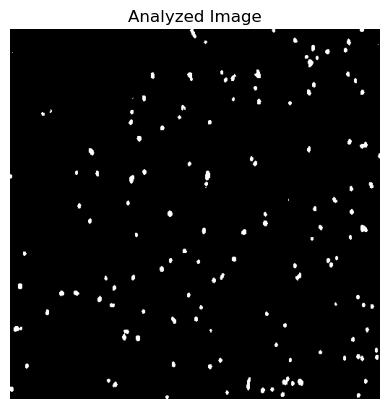

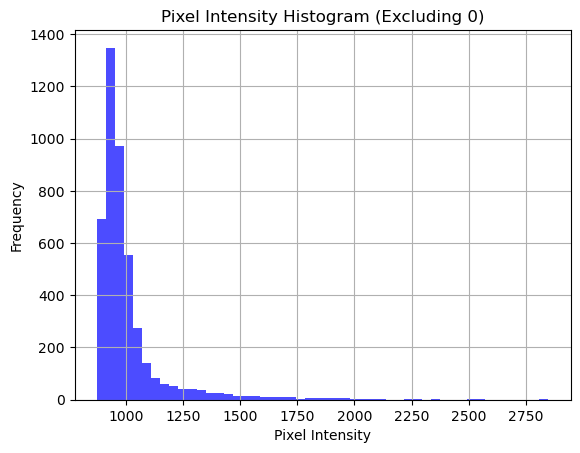

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load the analyzed image
file_path = r"E:\Aytekin\Data\AnalyzedBestModelGreen1\R_30_0520_936_B12-1-green_analyzed.tif"  # Replace with your file path
analyzed_image = Image.open(file_path)

# Get unique pixel intensity values without modifying or scaling
unique_intensity_values = np.unique(analyzed_image)
print("Unique intensity values:", unique_intensity_values)


# Display the image
plt.imshow(analyzed_image, cmap='gray')  # Assuming it's a grayscale image
plt.axis('off')  # Turn off axis labels
plt.title('Analyzed Image')
plt.show()

# Get unique pixel intensity values excluding 0
pixel_values = np.array(analyzed_image).flatten()
pixel_values_without_zero = pixel_values[pixel_values != 0]

# Plot histogram excluding 0
plt.hist(pixel_values_without_zero, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Histogram (Excluding 0)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
